<ipython-input-41-a31124bed1cc>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=['green', 'red'])


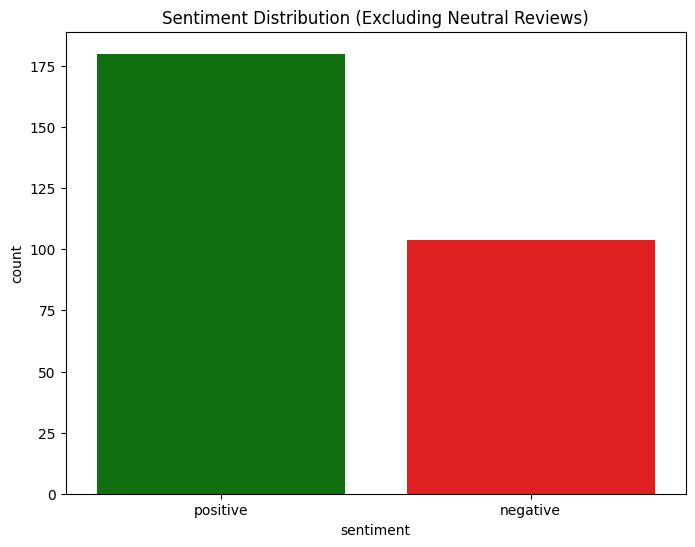

Initial Sentiment Counts (Excluding Neutral Reviews):
sentiment
positive    180
negative    104
Name: count, dtype: int64
Logistic Regression Accuracy: 0.82
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.57      0.71        21
    positive       0.80      0.97      0.88        36

    accuracy                           0.82        57
   macro avg       0.86      0.77      0.79        57
weighted avg       0.84      0.82      0.81        57

SVM Accuracy: 0.95
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.95      0.93        21
    positive       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



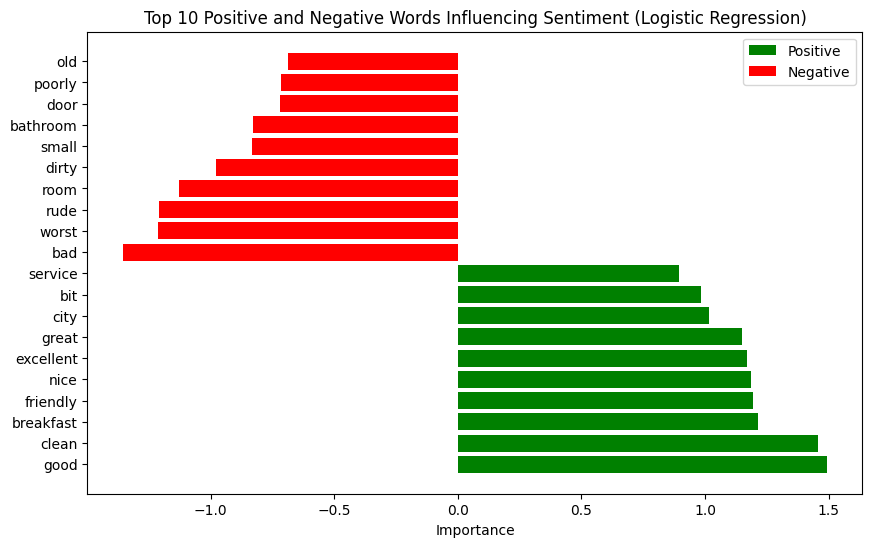

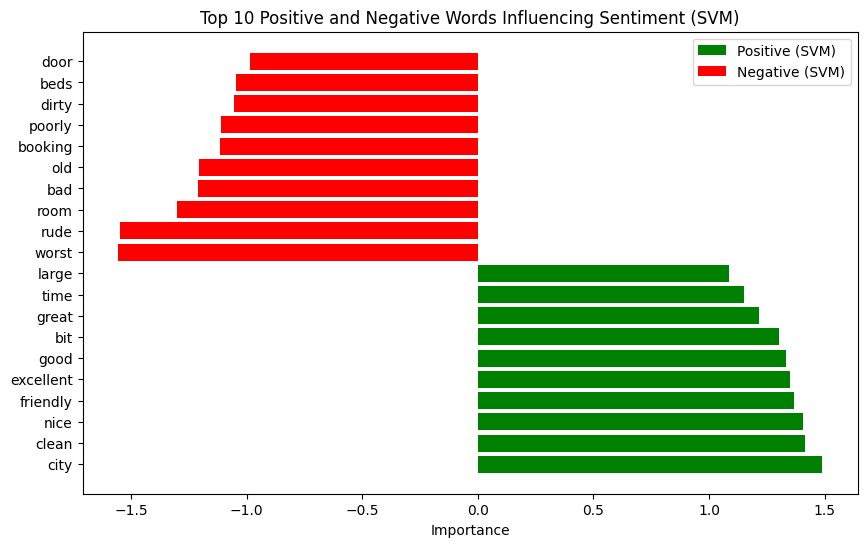


Neutral Reviews Sentiment Classification (Logistic Regression) Before Reintegration:
logreg_predicted_sentiment
positive    65
negative     9
Name: count, dtype: int64

Neutral Reviews Sentiment Classification (SVM) Before Reintegration:
svm_predicted_sentiment
positive    52
negative    22
Name: count, dtype: int64


<ipython-input-41-a31124bed1cc>:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='logreg_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])


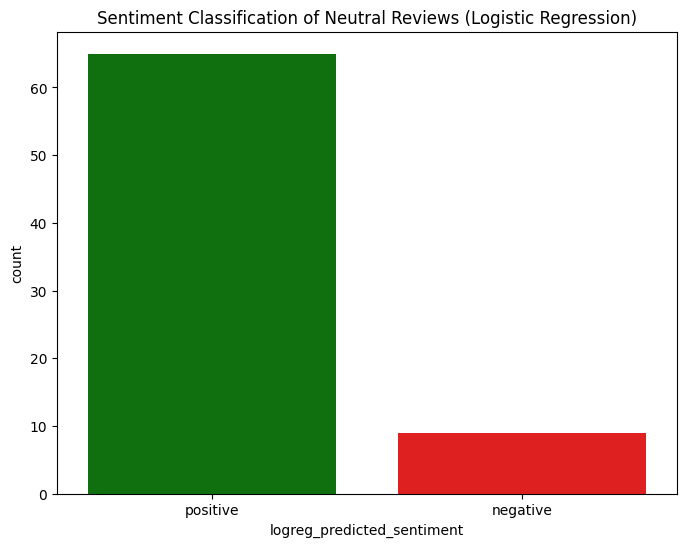

<ipython-input-41-a31124bed1cc>:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='svm_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])


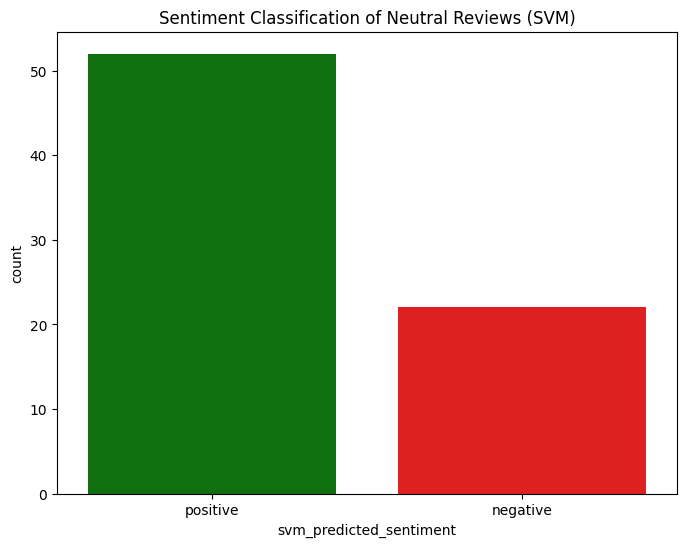

<ipython-input-41-a31124bed1cc>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])
<ipython-input-41-a31124bed1cc>:171: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])


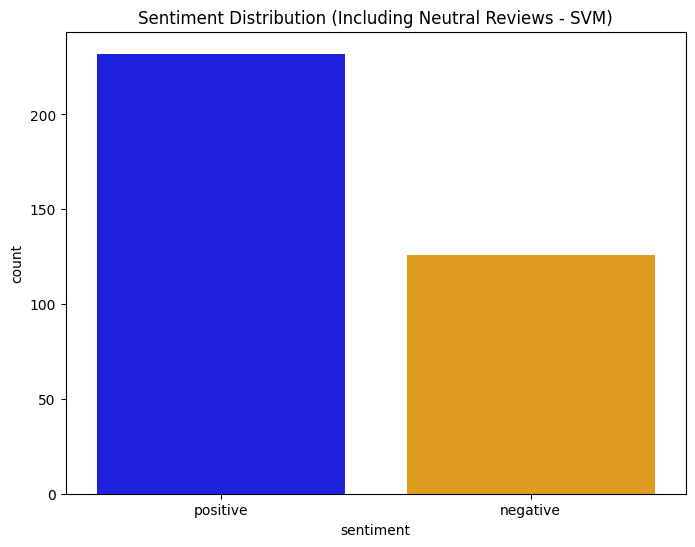


Final Sentiment Counts (Including Neutral Reviews - SVM):
sentiment
positive    232
negative    126
Name: count, dtype: int64


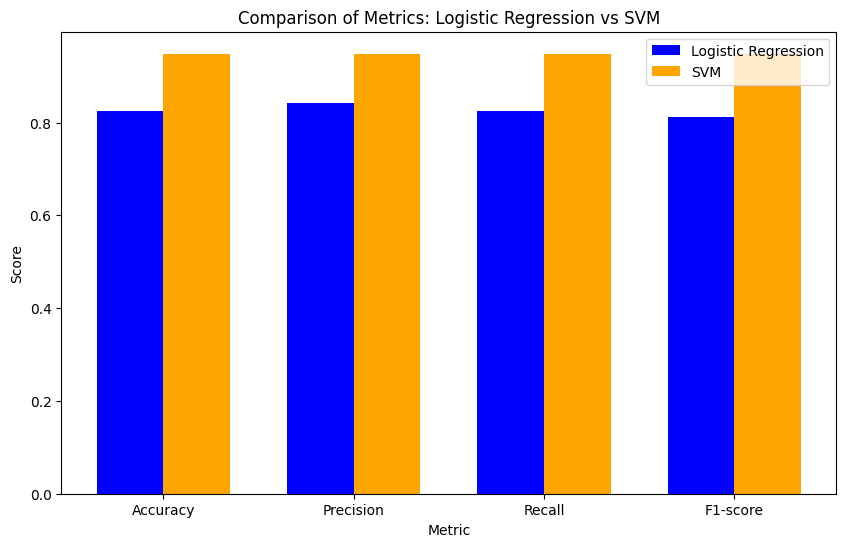

In [41]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('golden-city-hotel.csv')

# Function to label sentiments
def label_sentiment(star_rating):
    if star_rating in ['1/5', '2/5']:
        return 'negative'
    elif star_rating in ['4/5', '5/5']:
        return 'positive'
    else:
        return None  # Exclude neutral reviews (3/5) for now

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Clean and preprocess data
df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['rating'].apply(label_sentiment)

# Separate neutral reviews (3/5) for later classification
neutral_reviews = df[df['sentiment'].isnull()].copy()
df = df.dropna(subset=['sentiment'])

# Visualize sentiment distribution (without neutral reviews)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['green', 'red'])
plt.title('Sentiment Distribution (Excluding Neutral Reviews)')
plt.show()

# Print initial sentiment distribution
initial_sentiment_counts = df['sentiment'].value_counts()
print("Initial Sentiment Counts (Excluding Neutral Reviews):")
print(initial_sentiment_counts)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
X = tfidf_vectorizer.fit_transform(df['review'])
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate models
logreg_y_pred = logreg_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Visualizing top important words for sentiment using Logistic Regression
important_words = tfidf_vectorizer.get_feature_names_out()
logreg_important_scores = logreg_model.coef_.flatten()  # Flatten to 1D for sorting

top_words = sorted(zip(logreg_important_scores, important_words), reverse=True)[:10]  # Top 10 positive influencing words
bottom_words = sorted(zip(logreg_important_scores, important_words))[:10]  # Top 10 negative influencing words

# Display top positive and negative influencing words with importance scores
top_words_labels = [word for score, word in top_words]
top_words_values = [score for score, word in top_words]
bottom_words_labels = [word for score, word in bottom_words]
bottom_words_values = [score for score, word in bottom_words]

# Plot the top 10 positive and negative words
plt.figure(figsize=(10, 6))

# Plot positive words first (green)
plt.barh(top_words_labels, top_words_values, color='green', label='Positive')

# Plot negative words second (red)
plt.barh(bottom_words_labels, bottom_words_values, color='red', label='Negative')

plt.xlabel('Importance')
plt.title('Top 10 Positive and Negative Words Influencing Sentiment (Logistic Regression)')
plt.legend()
plt.show()

svm_important_scores = svm_model.coef_.toarray().flatten()  # Convert to dense array and flatten

top_svm_words = sorted(zip(svm_important_scores, important_words), reverse=True)[:10]  # Top 10 positive influencing words
bottom_svm_words = sorted(zip(svm_important_scores, important_words))[:10]  # Top 10 negative influencing words

# Display top positive and negative influencing words with importance scores for SVM
top_svm_words_labels = [word for score, word in top_svm_words]
top_svm_words_values = [score for score, word in top_svm_words]
bottom_svm_words_labels = [word for score, word in bottom_svm_words]
bottom_svm_words_values = [score for score, word in bottom_svm_words]

# Plot the top 10 positive and negative words for SVM
plt.figure(figsize=(10, 6))

# Plot positive words first (green)
plt.barh(top_svm_words_labels, top_svm_words_values, color='green', label='Positive (SVM)')

# Plot negative words second (red)
plt.barh(bottom_svm_words_labels, bottom_svm_words_values, color='red', label='Negative (SVM)')

plt.xlabel('Importance')
plt.title('Top 10 Positive and Negative Words Influencing Sentiment (SVM)')
plt.legend()
plt.show()


# Classify neutral reviews using Logistic Regression and SVM
if not neutral_reviews.empty:
    # Classify neutral reviews using Logistic Regression
    neutral_X = tfidf_vectorizer.transform(neutral_reviews['review'])
    neutral_reviews['logreg_predicted_sentiment'] = logreg_model.predict(neutral_X)

    # Classify neutral reviews using SVM
    neutral_reviews['svm_predicted_sentiment'] = svm_model.predict(neutral_X)

    # Display positive and negative counts for neutral reviews based on Logistic Regression
    logreg_neutral_sentiment_counts = neutral_reviews['logreg_predicted_sentiment'].value_counts()
    print("\nNeutral Reviews Sentiment Classification (Logistic Regression) Before Reintegration:")
    print(logreg_neutral_sentiment_counts)

    # Display positive and negative counts for neutral reviews based on SVM
    svm_neutral_sentiment_counts = neutral_reviews['svm_predicted_sentiment'].value_counts()
    print("\nNeutral Reviews Sentiment Classification (SVM) Before Reintegration:")
    print(svm_neutral_sentiment_counts)

    # Visualize the sentiment classification for neutral reviews using Logistic Regression
    plt.figure(figsize=(8, 6))
    sns.countplot(x='logreg_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])
    plt.title('Sentiment Classification of Neutral Reviews (Logistic Regression)')
    plt.show()

    # Visualize the sentiment classification for neutral reviews using SVM
    plt.figure(figsize=(8, 6))
    sns.countplot(x='svm_predicted_sentiment', data=neutral_reviews, palette=['green', 'red'])
    plt.title('Sentiment Classification of Neutral Reviews (SVM)')
    plt.show()

    # Reintegrate neutral reviews into the main dataset based on Logistic Regression predictions
    # Ensure you only add the appropriate sentiment column (not both Logistic Regression and SVM)
    neutral_reviews['sentiment'] = neutral_reviews['svm_predicted_sentiment']  # Choose Logistic Regression or SVM here --we choose svm
    df_with_neutral = pd.concat([df, neutral_reviews[['review', 'sentiment']]], ignore_index=True)

    # Visualize updated sentiment distribution (including neutral reviews classified by SVM)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=df_with_neutral, palette=['blue', 'orange', 'green'])
    plt.title('Sentiment Distribution (Including Neutral Reviews - SVM)')
    plt.show()

    # Print final sentiment counts including neutral reviews classified by SVM
    final_sentiment_counts = df_with_neutral['sentiment'].value_counts()
    print("\nFinal Sentiment Counts (Including Neutral Reviews - SVM):")
    print(final_sentiment_counts)

else:
    print("No neutral reviews to classify.")



# Calculate metrics for Logistic Regression
logreg_report = classification_report(y_test, logreg_y_pred, output_dict=True)
logreg_accuracy = logreg_report['accuracy']
logreg_precision = logreg_report['weighted avg']['precision']
logreg_recall = logreg_report['weighted avg']['recall']
logreg_f1 = logreg_report['weighted avg']['f1-score']

# Calculate metrics for SVM
svm_report = classification_report(y_test, svm_y_pred, output_dict=True)
svm_accuracy = svm_report['accuracy']
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1 = svm_report['weighted avg']['f1-score']

# Create a DataFrame for visualization
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}

metrics_df = pd.DataFrame(metrics_data)

# Plot the metrics for comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_df))

# Create bar plots
plt.bar(index, metrics_df['Logistic Regression'], bar_width, label='Logistic Regression', color='blue')
plt.bar([i + bar_width for i in index], metrics_df['SVM'], bar_width, label='SVM', color='orange')

# Add labels, title, and legend
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Metrics: Logistic Regression vs SVM')
plt.xticks([i + bar_width / 2 for i in index], metrics_df['Metric'])
plt.legend()
plt.show()


